In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# wrapper class for an interval
# readability is more important than efficiency, so I won't use many tricks
class Interval:
    # [@left, @right)
    def __init__(self, left, right):
        self.left = left
        self.right = right

    # whether a point is in this interval
    def contain(self, x):
        return self.left <= x < self.right

    # length of this interval
    def size(self):
        return self.right - self.left

In [3]:
# domain of the square wave, [0, 2)
DOMAIN = Interval(0.0, 2.0)

# square wave function
def square_wave(x):
    if 0.5 < x < 1.5:
        return 1
    return 0

# get @n samples randomly from the square wave
def sample(n):
    samples = []
    for i in range(0, n):
        x = np.random.uniform(DOMAIN.left, DOMAIN.right)
        y = square_wave(x)
        samples.append([x, y])
    return samples

In [4]:
# wrapper class for value function
class ValueFunction:
    # @domain: domain of this function, an instance of Interval
    # @alpha: basic step size for one update
    def __init__(self, feature_width, domain=DOMAIN, alpha=0.2, num_of_features=50):
        self.feature_width = feature_width
        self.num_of_featrues = num_of_features
        self.features = []
        self.alpha = alpha
        self.domain = domain

        # there are many ways to place those feature windows,
        # following is just one possible way
        step = (domain.size() - feature_width) / (num_of_features - 1)
        left = domain.left
        for i in range(0, num_of_features - 1):
            self.features.append(Interval(left, left + feature_width))
            left += step
        self.features.append(Interval(left, domain.right))

        # initialize weight for each feature
        self.weights = np.zeros(num_of_features)

    # for point @x, return the indices of corresponding feature windows
    def get_active_features(self, x):
        active_features = []
        for i in range(0, len(self.features)):
            if self.features[i].contain(x):
                active_features.append(i)
        return active_features

    # estimate the value for point @x
    def value(self, x):
        active_features = self.get_active_features(x)
        return np.sum(self.weights[active_features])

    # update weights given sample of point @x
    # @delta: y - x
    def update(self, delta, x):
        active_features = self.get_active_features(x)
        delta *= self.alpha / len(active_features)
        for index in active_features:
            self.weights[index] += delta

# train @value_function with a set of samples @samples
def approximate(samples, value_function):
    for x, y in samples:
        delta = y - value_function.value(x)
        value_function.update(delta, x)

In [5]:
# Figure 9.8
def figure_9_8():
    num_of_samples = [10, 40, 160, 640, 2560, 10240]
    feature_widths = [0.2, 0.4, 1.0]
    plt.figure(figsize=(30, 20))
    axis_x = np.arange(DOMAIN.left, DOMAIN.right, 0.02)
    for index, num_of_sample in enumerate(num_of_samples):
        print(num_of_sample, 'samples')
        samples = sample(num_of_sample)
        value_functions = [ValueFunction(feature_width) for feature_width in feature_widths]
        plt.subplot(2, 3, index + 1)
        plt.title('%d samples' % (num_of_sample))
        for value_function in value_functions:
            approximate(samples, value_function)
            values = [value_function.value(x) for x in axis_x]
            plt.plot(axis_x, values, label='feature width %.01f' % (value_function.feature_width))
        plt.legend()
    plt.show()

10 samples
40 samples
160 samples
640 samples
2560 samples
10240 samples


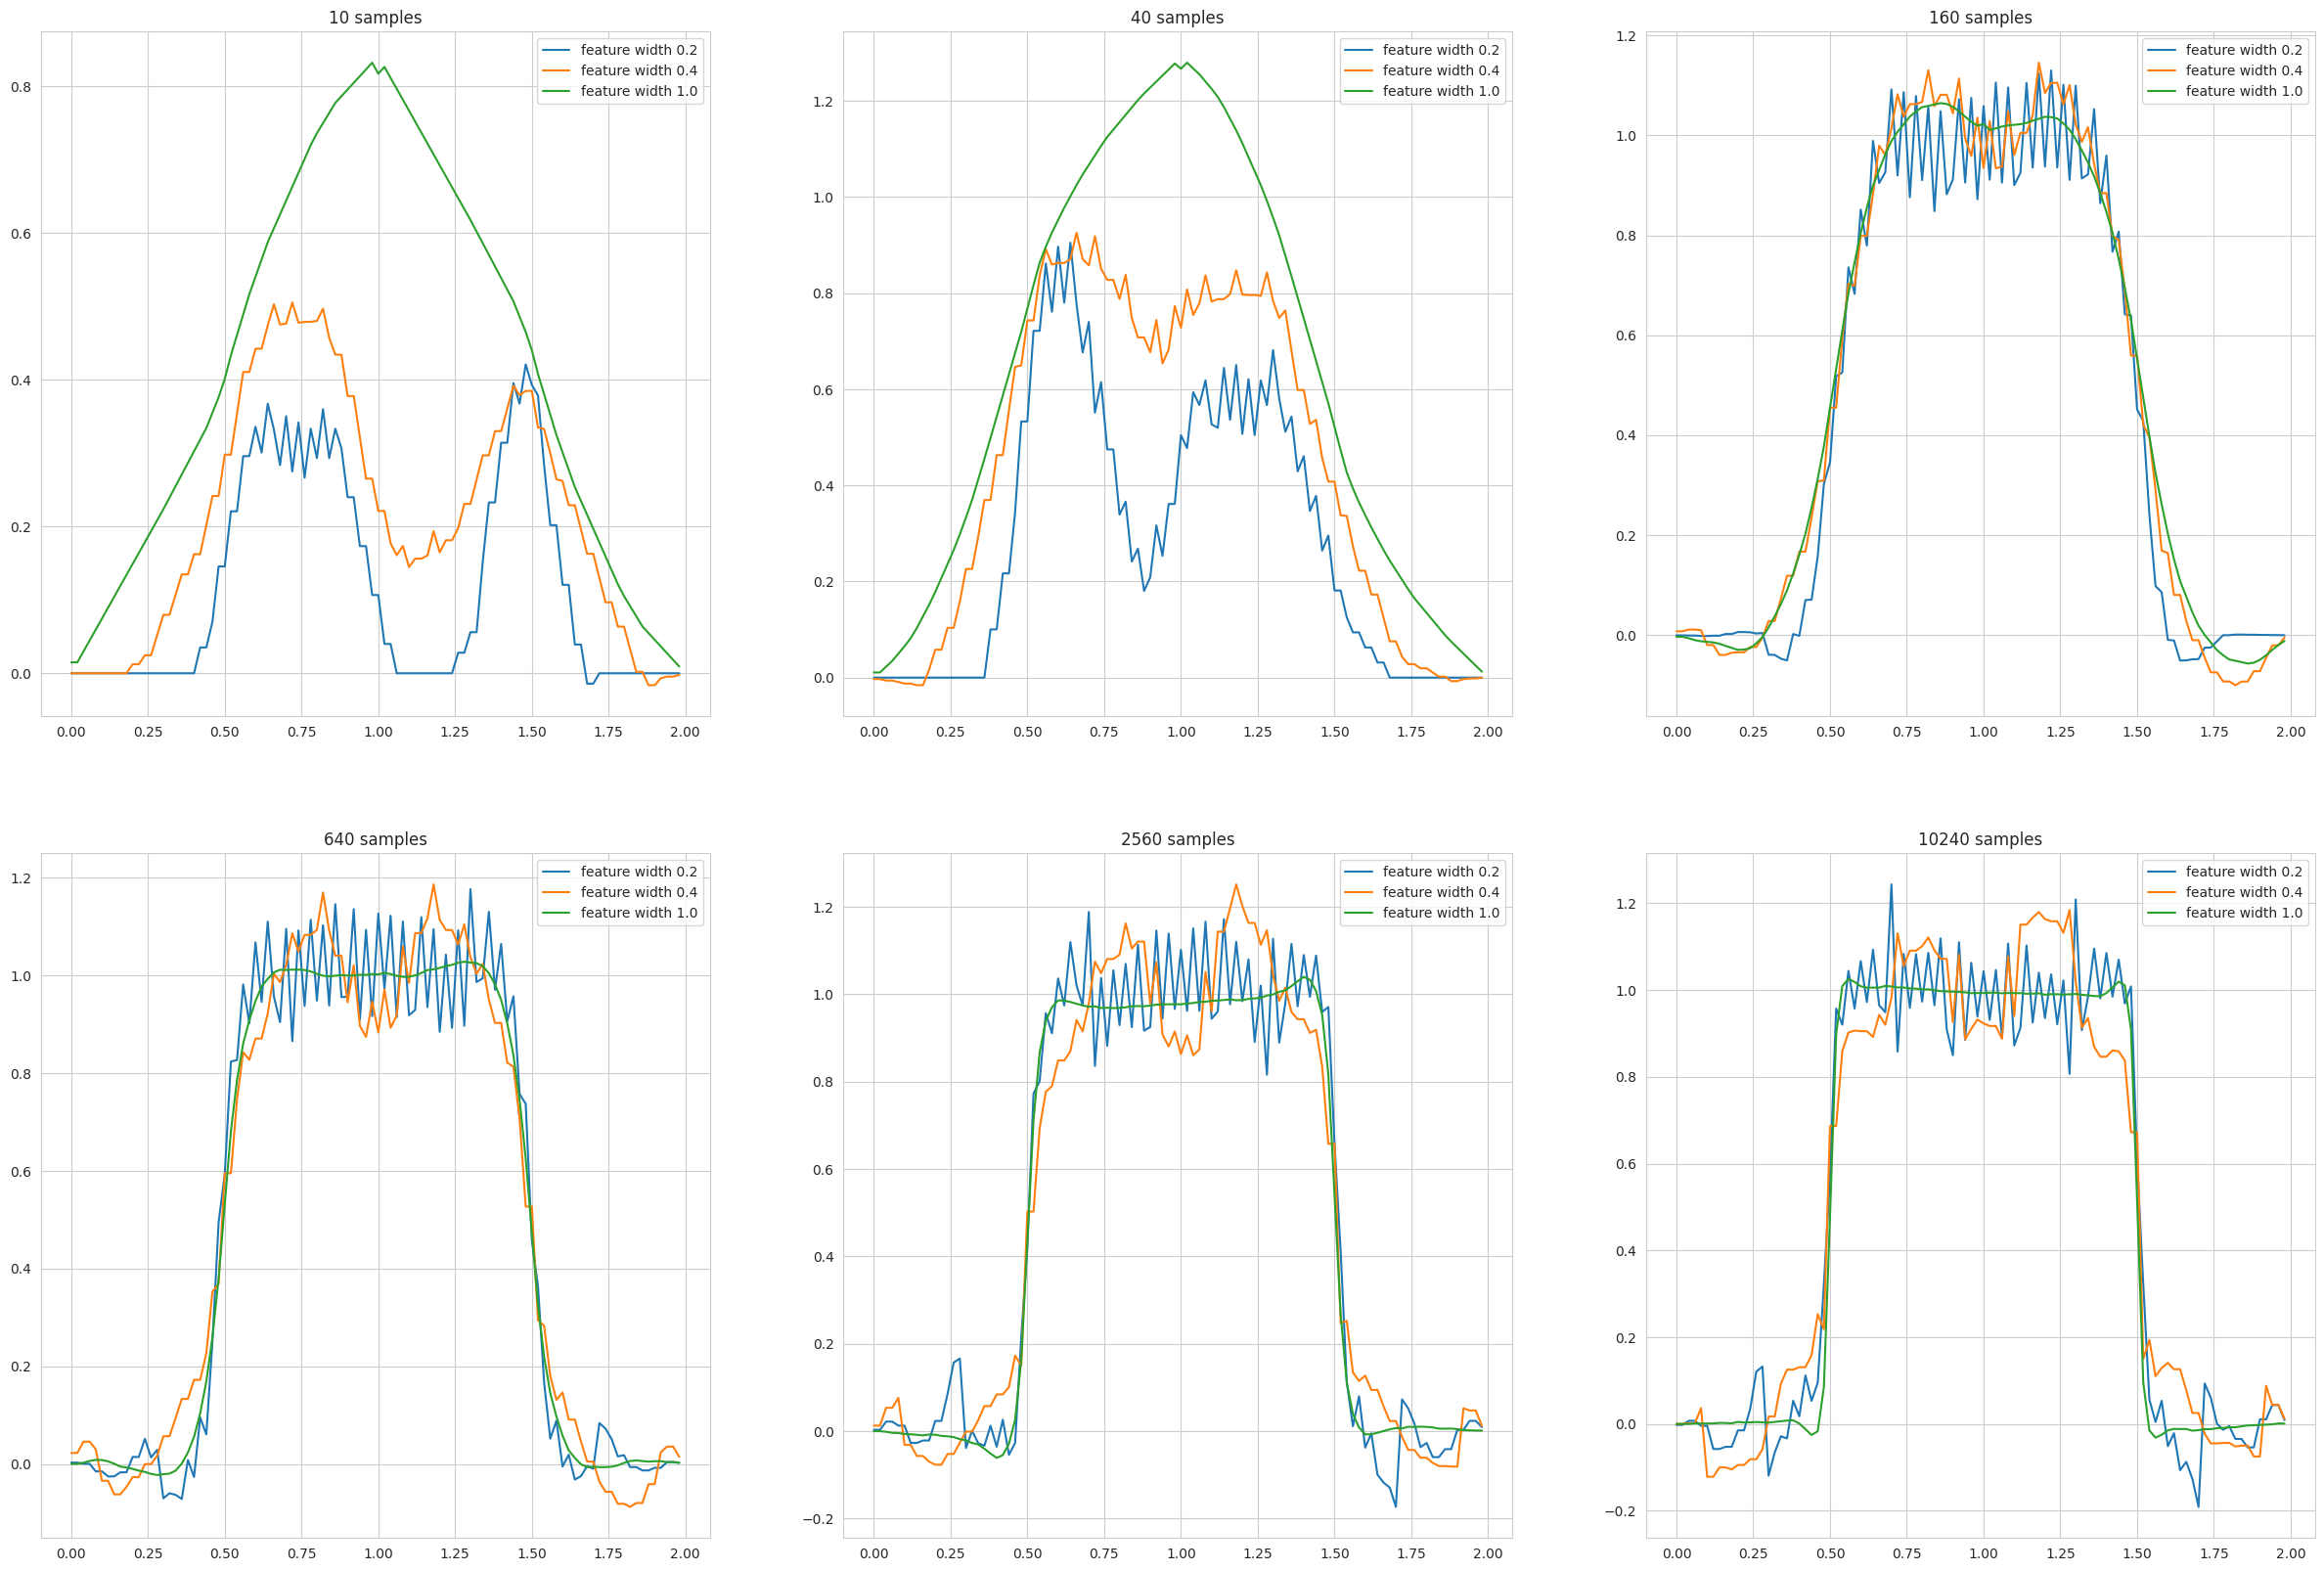

In [6]:
figure_9_8()